# Implementation of a trilinear brick element

This tutorial is dedicated to present the implementation of deatils of a D3_nn8_hex finite element. That is, a 3D brick element with 8 nodes and trilinear shape functions.

## Visualize the element, nodes and integration points

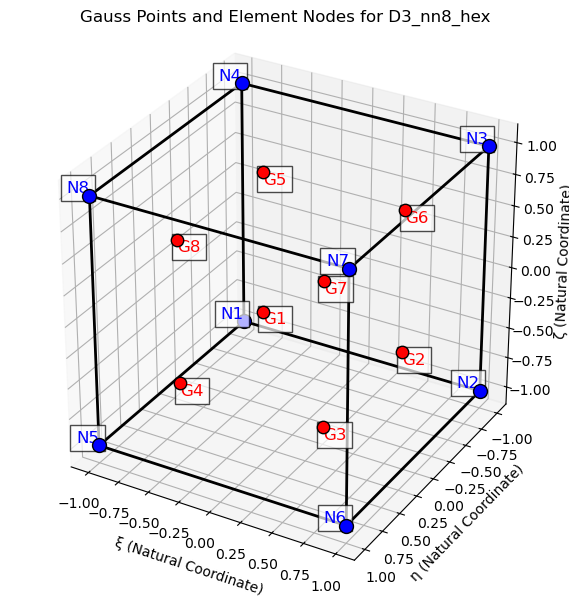

In [1]:
# --- Import the solver from /src directiory (Don't touch!) ---
import sys
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(project_path, "src"))
from finite_element_method import discretization_demo_helper_fcns as di_demo
import numpy as np

# Specify finite element type (only D3_nn8_hex available)
ele_type = "D3_nn8_hex"

# Choose number of Gauss integrations points (either 1 or 8)
num_gauss_pts = 8

# Plot the element and its nodes and integration points
fname = "D3_nn8_hex_8gp.png"
di_demo.visualize_gauss_pts(fname, ele_type, num_gauss_pts)

## Interpolate a field over the element using shape functions and nodal values

Now, having some nodal values, we want to use the trilinear shape functions in order to interpolate them over the entire element.

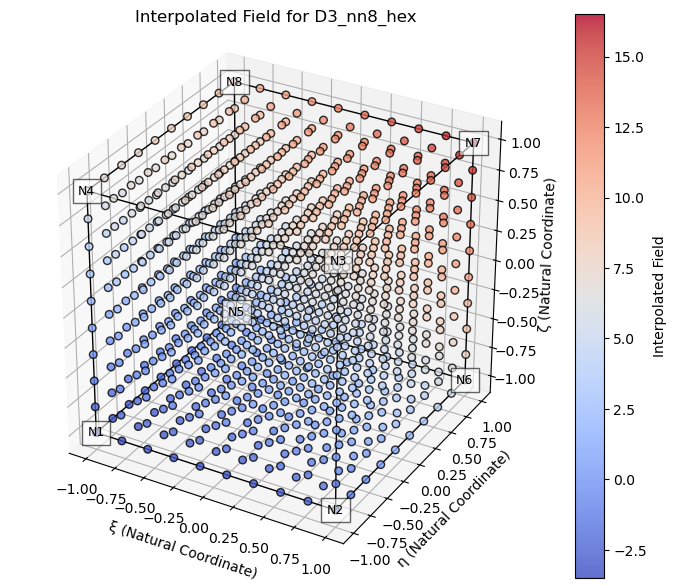

In [4]:
# Define a function to generate nodal values
def fcn(xi, eta, zeta):
    return 2.0 * xi + 3.0 * eta + 1.5 * xi * eta + 5 * zeta + 5.0

# Specify finite element type (only D3_nn8_hex available)
ele_type = "D3_nn8_hex"

# Natural coordinates of the 8 nodes in the reference brick
node_coords = np.array([[-1, -1, -1], [1, -1, -1], [1, -1, 1], [-1, -1, 1], [-1, 1, -1], [1, 1, -1], [1, 1, 1], [-1, 1, 1]])

# Evaluate the function at each node
node_values = np.array([fcn(xi, eta, zeta) for xi, eta, zeta in node_coords])

# Interpolate the generated nodal values over the element
fname = ele_type + "_interpolate_fcn.png"
di_demo.plot_interpolate_field_natural_coords_single_element(fname, ele_type, node_values)

## Mapping a physical element to the reference element using the isoparametric concept

Now, we define a physical element in the physical coordinates ($x$, $y$, $z$) and defined its nodal values. We want to know what is going on across this element, so we map it to the reference element defined in the natural coordinates ($\xi$, $\eta$, $\zeta$) and interpolate over the reference element as we did above, then we map back to the physical element. The mapping is done using the isoparametric concept.

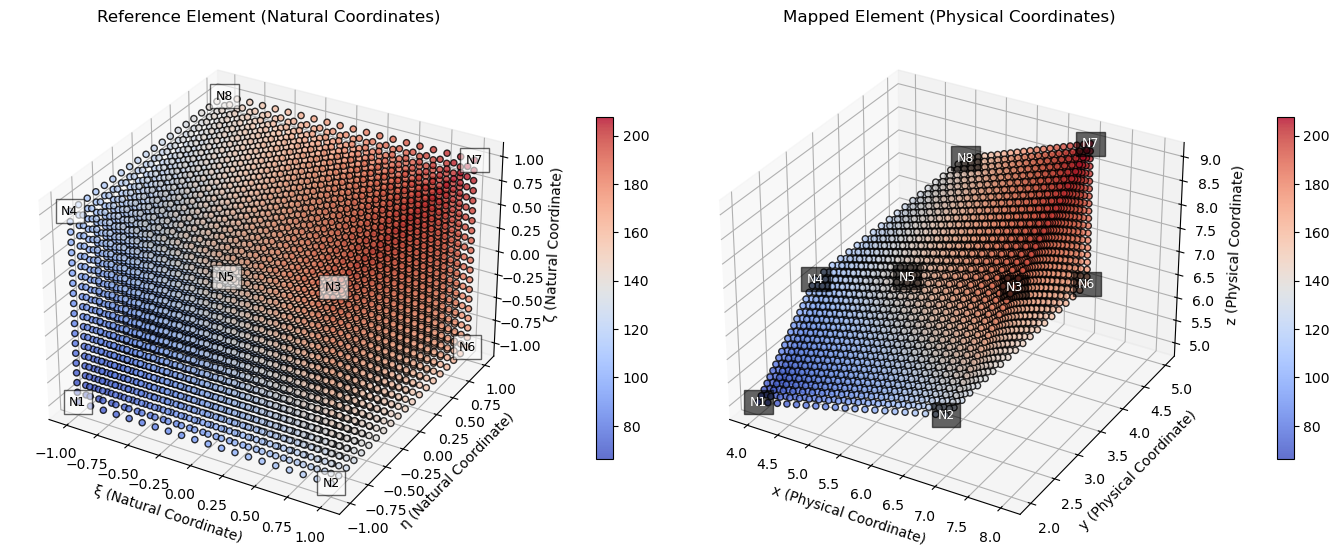

In [8]:
# Specify finite element type (only D3_nn8_hex available)
ele_type = "D3_nn8_hex"

# Define a function to generate nodal values over the physical elements
def fcn(x, y, z):
    return 2.0 * x + 3.0 * y + 1.5 * x * y + 2.0 * x * z
    
# Physical coordinates of the 8 nodes in the physical element
node_coords = np.array([[4, 2, 5], [7, 2, 6], [8, 2, 9], [5, 2, 8], [4, 5, 5], [7, 5, 6], [7, 5, 9], [5, 5, 8]])

# Physical nodal values
node_values = np.array([fcn(x, y, z) for x, y, z in node_coords])

# Interpolate the physical nodal values over the reference element
fname = ele_type + "_interpolate_fcn_physical_coords.png"
di_demo.visualize_isoparametric_mapping_single_element(str(fname), ele_type, node_coords, node_values)

## Differentiating using the isoparametric concept

We want to use the isoparaetric concept to take the derivative. As above, we define the physical element and its nodal values and map them to the reference element. We then use the derivatives of the shape functions in order to get the value of the derivative at a certain point in the reference element, which corresponds to a certain point in the physical element. We compare what we get with the test value obtained from the assumed-known derivative function.

In [12]:
# Define a function to generate nodal values over the physical elements
def fcn(x, y, z):
    return 2.0 * x + 3.0 * y + 1.5 * x * y + 2.0 * x * z

# Write the partial derivative of the function with respect to x, y and z
def fcn_deriv(x, y, z):
    return np.asarray([2.0 + 1.5 * y + 2.0 * z, 3.0 + 1.5 * x, 2.0 * x]).reshape((3, 1))

# Specify finite element type (only D3_nn8_hex available)
ele_type = "D3_nn8_hex"

# Physical coordinates of the 8 nodes in the physical element
node_coords = np.array([[2, 2, 2], [6, 2, 2], [6, 2, 5], [2, 2, 5], [2, 5, 2], [6, 5, 2], [6, 5, 5], [2, 5, 5]])

# Physical nodal values
node_values = np.array([fcn(x, y, z) for x, y, z in node_coords])

# element center in natural coordinates
xi, eta, zeta = 0, 0, 0

# Map the test point from natural to physical coordinates
x_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 0], [xi], [eta], [zeta]
).flatten()[0]
y_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 1], [xi], [eta], [zeta]
).flatten()[0]
z_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 2], [xi], [eta], [zeta]
).flatten()[0]


# Evaluate the function derivative in physical coordinates
mapped_deriv = fcn_deriv(x_mapped, y_mapped, z_mapped)

# Compute the numerical gradient in natural coordinates
gradient_natural = di_demo.interpolate_gradient_natural_coords_single_element(
    ele_type, node_values, np.array([xi]), np.array([eta]), np.array([zeta])
)

# Map the numerical gradient to physical coordinates
gradient_physical = di_demo.transform_gradient_to_physical(
    ele_type, node_coords, np.array([xi]), np.array([eta]), np.array([zeta]), gradient_natural
).reshape((3, 1))

if np.allclose(mapped_deriv, gradient_physical, atol=10e-10):
    print("analytical and numerical derivatives match!")

else:
    print("not matching!")


analytical and numerical derivatives match!


## Integrating the derivative using the isoparameteric concept and numerical integration

Now, we .....

In [27]:
def fcn(x, y, z):
    return 3.0 * x + 10.0 * y + 2.0 * z

def fcn_deriv(x, y, z):
    return np.asarray([3.0, 10.0, 2.0])  # df/dx = 3.0, df/dy = 10.0, df/dz = 2.0

def element_volume(node_coords):
    # Approximate volume using the determinant of the Jacobian at center (valid for regular bricks)
    J = di_demo.compute_jacobian("D3_nn8_hex", node_coords, 0.0, 0.0, 0.0)
    return 8.0 * np.abs(np.linalg.det(J))

def integral_of_deriv(node_coords):
    vol = element_volume(node_coords)
    return np.array([3.0 * vol, 10.0 * vol, 2.0 * vol]).reshape((3, 1))

ele_type = "D3_nn8_hex"
num_gauss_pts = 8
node_coords = np.array([[2, 2, 2], [6, 2, 2], [6, 2, 5], [2, 2, 5], [2, 5, 2], [6, 5, 2], [6, 5, 5], [2, 5, 5]])

# Compute nodal values from fcn(x, y, z)
nodal_values = np.array([[fcn(x, y, z) for x, y, z in node_coords]]).T

# Numerical integration of gradient
integral_numerical = di_demo.compute_integral_of_derivative(
    ele_type,
    num_gauss_pts,
    node_coords,
    nodal_values,
    di_demo.gauss_pts_and_weights,
    di_demo.interpolate_gradient_natural_coords_single_element,
    di_demo.transform_gradient_to_physical,
    di_demo.compute_jacobian
)

# Analytical reference
integral_analytical = integral_of_deriv(node_coords)

# check result
if np.allclose(integral_numerical, integral_analytical, atol=10e-10):
    print("analytical and numerical integrals of derivatives match!")
else:
    print("Not matching!")

analytical and numerical integrals of derivatives match!
